# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [ ]:
from keras.datasets import cifar100
import numpy as np

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
print("X train shape:", x_train.shape)
print("y train shape:", y_train.shape)
print("X test shape:", x_test.shape)
print("y test shape:", y_test.shape)

X train shape: (50000, 32, 32, 3)
y train shape: (50000, 1)
X test shape: (10000, 32, 32, 3)
y test shape: (10000, 1)


There are 50000 training images. The size of images is 32 x 32. There are 3 color channels (RGB) for each of the images. There are 10000 images of same attributes in the test set. (50000, 1) shape of y indicates that is a single label/classification for each image.


In [ ]:
# Check the unique classes in the training labels
unique_classes = np.unique(y_train)
num_classes = len(unique_classes)
print(num_classes)

100


In [ ]:
# This list is from documentation of the Cifar-100 fine dataset

cifar100_fine_label_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'cra', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum',
    'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark',
    'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel',
    'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone',
    'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle',
    'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

print(len(cifar100_fine_label_names))


100


Displaying some examples from training set


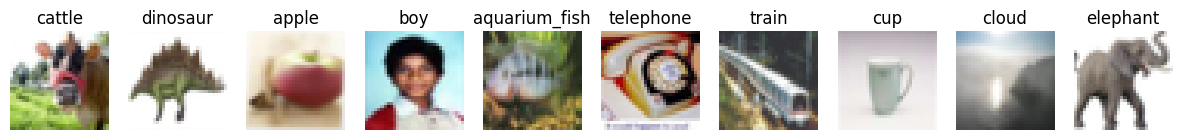

In [ ]:
import matplotlib.pyplot as plt
num_images = 10
fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
for i in range(num_images):
  axes[i].imshow(x_train[i])
  axes[i].axis('off')  # Hide axes
  label = y_train[i][0]
  axes[i].set_title(cifar100_fine_label_names[label])

print("Displaying some examples from training set")
plt.show()



### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [ ]:
from keras.utils import to_categorical

print("Scale of training data", x_train.min(), x_train.max())
print("Scale of testing data", x_test.min(), x_test.max())

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Confirm the scale of the entire dataset (should remain unchanged after scaling)
print("Scale of training data after scaling:", x_train.min(), x_train.max())
print("Scale of testing data after scaling:", x_test.min(), x_test.max())

Scale of training data 0 255
Scale of testing data 0 255
Scale of training data after scaling: 0.0 1.0
Scale of testing data after scaling: 0.0 1.0


In [ ]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
from sklearn.model_selection import train_test_split
x_only_train, x_valid, y_only_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, # 20% of the data is used for validation
                                                      random_state=42 # Providing a value here means getting the same "random" split every time
                                                      )
y_only_train = to_categorical(y_only_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)

In [ ]:
print(x_only_train.shape, y_only_train.shape)

(40000, 32, 32, 3) (40000, 100, 100)


In [ ]:
print(x_valid.shape, y_valid.shape)

(10000, 32, 32, 3) (10000, 100, 100)


In [ ]:
import pandas as pd
pd.DataFrame(y_test).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from keras.regularizers import l2

# Define a model

model_1 = Sequential([
        # Block 1
        Input(shape=(32, 32, 3)),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        # Block 2
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        # Block 2
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(512, activation='relu'),
        Dense(100, activation='softmax')

])

model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,882,532 (7.18 MB)

 Trainable params: 1,882,532 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ___categorical_crossentropy___

- <b>Optimizer:</b> __adam__


The 'categorical_crossentropy' loss function is used because the target variable is one-hot encoded vector and the task classification. The 'softmax' activation function converts model output into probablity distribution for each classes. The loss function then calculates the loss from the true labels and the predicted output probabilities.

Adam is a popular optimizer because it adjusts learning rates for each parameter individually, handles sparse data and noisy gradients effectively, and often converges more reliably compared to other optimizers.

In [ ]:
from keras import optimizers
from keras.metrics import AUC, Precision, Recall

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])



## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [ ]:
history_1 = model_1.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.2)


Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.0312 - loss: 4.3515 - precision: 0.2205 - recall: 2.6641e-04 - val_accuracy: 0.0941 - val_loss: 3.8349 - val_precision: 0.5814 - val_recall: 0.0075
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1232 - loss: 3.6530 - precision: 0.5261 - recall: 0.0111 - val_accuracy: 0.1896 - val_loss: 3.3257 - val_precision: 0.6536 - val_recall: 0.0283
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2166 - loss: 3.1442 - precision: 0.6458 - recall: 0.0532 - val_accuracy: 0.2469 - val_loss: 3.0120 - val_precision: 0.6290 - val_recall: 0.0729
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2803 - loss: 2.8286 - precision: 0.6938 - recall: 0.0972 - val_accuracy: 0.2677 - val_loss: 2.9564 - val_precision: 0.6422 - val_recall: 0.1014
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3299 - loss: 2.5676 - precision: 0.7154 - recall: 0.1452 - val_accuracy: 0.302

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ___33.81%___
- <b>Other metric:</b> ___Precision and Recall___
- <b>Reason for selection:</b> Accuracy alone might be misleading in cases of class imbalance. CIFAR-100 contains 100 classes, and some of these classes are underrepresented compared to others. Accuracy alone can be misleading becuase it might reflect a model's performace on the majority classes rather than the minority classes. Precision and recall can give more insights into how well the model performs across different classes. When we aggregate the Precision value for all the classes, it tells us on an average how many of the positive predictions made by the model are correct. Likewise, the aggregated Recall value indicates an average value of how many of the actual positive instance were correctly identified.
- <b>Value of metric:</b> ___Precision: 0.45 Recall: 0.29___
- <b>Interpretation of metric value:</b> Precision value indicates that 45% of the positive predictions are correct. It shows moderate reliability of positive predictions. Recall values indicates that the model detects only 29% of the actual positive cases, suggesting that it misses a large number of positive cases.

In [ ]:
from sklearn.metrics import confusion_matrix

def get_metric_on_test(model):
    loss, accuracy, precision, recall = model.evaluate(x_test, y_test)

    print(f'Loss:     {loss:.2f}')
    print(f'Accuracy: {accuracy*100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')

    return loss, accuracy, precision, recall

loss_1, accuracy_1, precision_1, recall_1 = get_metric_on_test(model_1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3395 - loss: 3.8014 - precision: 0.4488 - recall: 0.2895
Loss:     3.82
Accuracy: 33.81%
Precision: 0.45
Recall: 0.29


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

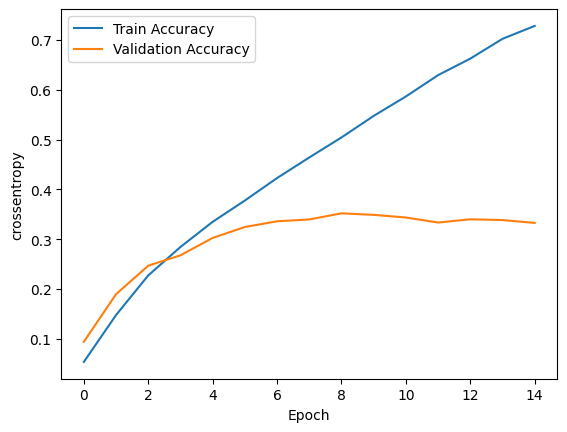

In [ ]:
import matplotlib.pyplot as plt

def plot_metric(history):

    #plt.plot(history.history['loss'], label='Train Loss')
    #plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('crossentropy')
    plt.legend()
    plt.show()

plot_metric(history_1)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Number of correct predictions 3381
Number of incorrect predictions 6619


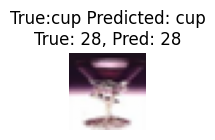

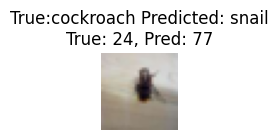

Correct Image probabilities:
 [1.73575567e-14 1.13854523e-13 3.15567406e-10 4.25953630e-12
 4.64299009e-13 1.13159331e-06 4.21595530e-15 1.95568020e-10
 5.79570910e-14 1.31684331e-07 9.57878219e-05 2.78761092e-07
 1.60435121e-09 3.90269728e-09 7.82722987e-15 1.49572787e-09
 1.52853193e-06 1.76748312e-22 1.01417470e-08 1.08372851e-11
 1.62681044e-05 1.28196336e-12 2.54584080e-07 1.98566994e-07
 5.77820615e-13 1.16507522e-07 9.35908902e-12 1.40195874e-12
 9.99362290e-01 8.73326078e-10 4.47502105e-12 5.44757720e-14
 1.51528543e-13 1.62699856e-12 1.20296107e-13 4.39347430e-12
 3.33973613e-11 6.85147428e-16 3.73200906e-12 9.71813963e-10
 2.03329109e-04 1.31634536e-12 1.16874406e-13 2.49729570e-18
 1.73981547e-07 2.37174915e-11 2.64505888e-06 6.89385441e-12
 4.30645447e-18 1.23183963e-11 2.12007545e-09 2.86419386e-08
 1.99920723e-25 1.33135950e-15 3.45446653e-13 1.87587066e-08
 1.46740918e-11 3.01274782e-12 2.12012794e-13 4.43845834e-13
 3.80726998e-13 4.53490223e-08 4.74654987e-15 4.0671029

In [ ]:
import math

def plot_correct_incorrect_images(model, index):

    def plot_image(image, true_label, predicted_label, title):
        plt.figure(figsize=(1, 1))
        plt.imshow(image)
        plt.title(f"{title}\nTrue: {true_label}, Pred: {predicted_label}")
        plt.axis('off')
        plt.show()

    y_pred_prob = model.predict(x_test)

    # get the predicted class
    y_pred_class = np.argmax(y_pred_prob, axis=1)

    y_true = np.argmax(y_test, axis=1)

    correct_indices = np.where(y_pred_class == y_true)[0]
    incorrect_indices = np.where(y_pred_class != y_true)[0]

    print('Number of correct predictions', len(correct_indices))
    print('Number of incorrect predictions', len(incorrect_indices))

    correct_image_idx = correct_indices[index]
    incorrect_image_idx = incorrect_indices[index]

    correct_image = x_test[correct_image_idx]
    correct_label = y_true[correct_image_idx]
    correct_pred = y_pred_class[correct_image_idx]

    incorrect_image = x_test[incorrect_image_idx]
    incorrect_label = y_true[incorrect_image_idx]
    incorrect_pred = y_pred_class[incorrect_image_idx]


    # Plot the correctly classified image
    plot_image(correct_image, correct_label, correct_pred,
               'True:' + cifar100_fine_label_names[correct_label] + ' Predicted: ' + cifar100_fine_label_names[correct_pred])

    # Plot the incorrectly classified image
    plot_image(incorrect_image, incorrect_label, incorrect_pred,
               'True:' + cifar100_fine_label_names[incorrect_label] + ' Predicted: ' + cifar100_fine_label_names[incorrect_pred])

    y_pred_prob_correct = y_pred_prob[correct_image_idx]
    y_pred_prob_incorrect = y_pred_prob[incorrect_image_idx]
    print("Correct Image probabilities:\n", y_pred_prob_correct)
    print("Max probability for correct image is at index", np.argmax(y_pred_prob_correct), ":", np.max(y_pred_prob_correct))

    print("Incorrect Image probabilities:\n", y_pred_prob_incorrect)
    print("Max Probability for incorrect image is at index", np.argmax(y_pred_prob_incorrect), ":", np.max(y_pred_prob_incorrect))

plot_correct_incorrect_images(model_1, 100)


The model starts with low accuracy(3.12% for training and 9.41% for validation set) which gradually increased over epochs. The accuracy on training set improves, but for validation set it stalls or decreases. This indicates overfitting. The model is learning the training data well but failling to generalize on new and unseen data. Increasing the size of dataset or tuning the hyperparameters or modifying the model itself might give better results.

For correctly identified images, the model will have the highest probability for the true label and lower probablity for other classes. It indicates confidence in the prediction. For incorrectly identified images, the model shows high probability for a wrong label, which means the model is confused about that class. It means that the model is struggling with that particular class or image.

In the example above, for the cup image, the probability value at index value of 28 is the highest, which indicates the correct classification. For the cockroach image example, the highest probability is found at index 77 (which is a snail) instead of 24 (which is cockroach).

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [ ]:
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from skimage.transform import resize
import tensorflow as tf

model_2 = Sequential([

        Input(shape=(32, 32, 3)),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(100, activation='softmax')

])

model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 2, 2, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 2, 2, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          51,3

 Total params: 1,886,500 (7.20 MB)

 Trainable params: 1,884,516 (7.19 MB)

 Non-trainable params: 1,984 (7.75 KB)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [ ]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

In [ ]:
history_2 = model_2.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.0930 - loss: 4.0801 - precision_1: 0.3717 - recall_1: 0.0089 - val_accuracy: 0.1576 - val_loss: 3.5707 - val_precision_1: 0.3749 - val_recall_1: 0.0478
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.2320 - loss: 3.0956 - precision_1: 0.6085 - recall_1: 0.0656 - val_accuracy: 0.2608 - val_loss: 2.9718 - val_precision_1: 0.6560 - val_recall_1: 0.0898
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3239 - loss: 2.6327 - precision_1: 0.6684 - recall_1: 0.1344 - val_accuracy: 0.3294 - val_loss: 2.6117 - val_precision_1: 0.6774 - val_recall_1: 0.1583
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3913 - loss: 2.3050 - precision_1: 0.7043 - recall_1: 0.2043 - val_accuracy: 0.3507 - val_loss: 2.5830 - val_precision_1: 0.6500 - val_recall_1: 0.1957
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4503 - loss: 2.0132 - precision_1: 0.7288 - recall

In [ ]:
loss_2, accuracy_2, precision_2, recall_2 = get_metric_on_test(model_2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4267 - loss: 3.5751 - precision_1: 0.5010 - recall_1: 0.3976
Loss:     3.61
Accuracy: 42.69%
Precision: 0.50
Recall: 0.40


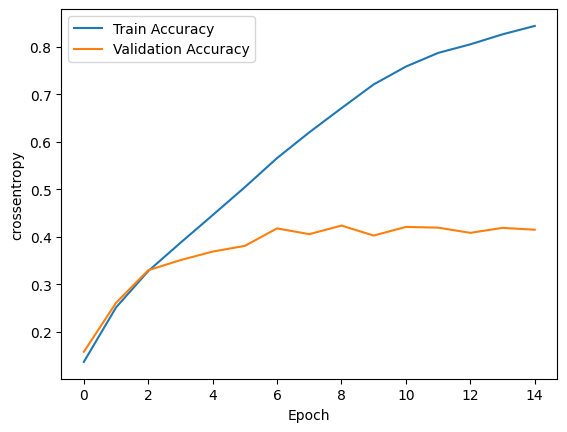

In [ ]:
plot_metric(history_2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Number of correct predictions 4269
Number of incorrect predictions 5731


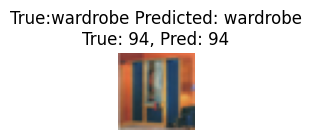

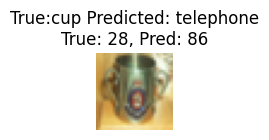

Correct Image probabilities:
 [1.04827369e-10 6.13146903e-12 4.26780922e-09 6.03122205e-11
 7.77318097e-13 9.07473985e-10 2.76202943e-13 2.26114267e-19
 3.46016127e-09 8.42255849e-06 6.23501206e-09 5.79770898e-09
 5.10491169e-08 7.72964881e-07 1.35030096e-15 2.01316450e-10
 3.90326208e-03 5.61651115e-10 1.35987109e-12 2.98940941e-11
 8.50554542e-08 5.85057169e-10 7.51233964e-10 3.59502087e-13
 3.74134494e-18 4.86403167e-07 2.45222991e-11 1.45453112e-15
 6.94830987e-06 8.46845438e-09 6.46139323e-11 8.40665670e-09
 1.51361892e-11 1.72192607e-08 1.31842271e-11 4.03770883e-08
 6.57412041e-11 6.82809753e-10 9.64472778e-14 2.39409985e-07
 1.19018758e-07 1.94843539e-15 2.20568341e-10 2.31712582e-09
 2.79565926e-09 2.41039855e-10 1.06953712e-05 5.30820943e-11
 1.62426392e-10 4.71056363e-17 6.14063000e-13 2.12934503e-10
 2.28973949e-15 4.50031941e-08 1.36558813e-14 4.25723545e-15
 2.39771497e-14 4.26278561e-11 4.91185738e-11 6.00528871e-12
 4.85300514e-14 4.64425755e-11 3.20371729e-09 1.1381646

In [ ]:
plot_correct_incorrect_images(model_2, 100)

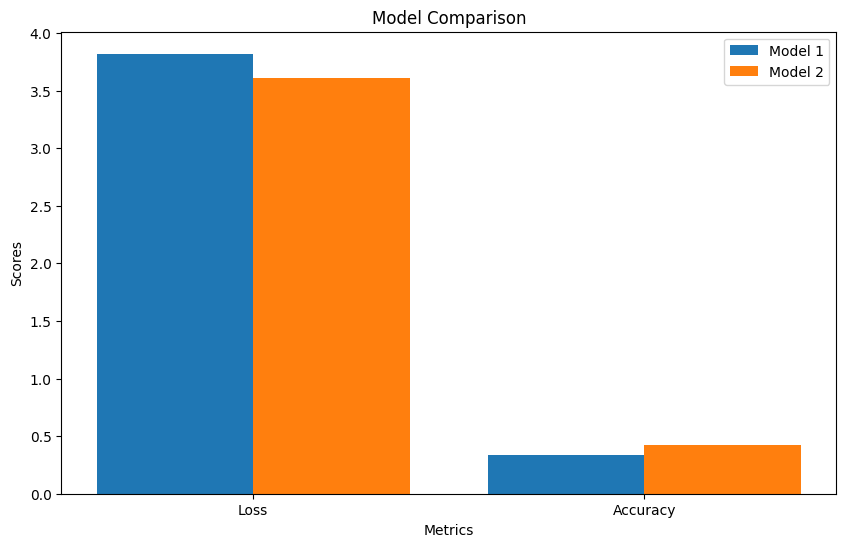

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
metrics = ['Loss', 'Accuracy']
model1_scores = [loss_1, accuracy_1]
model2_scores = [loss_2, accuracy_2]

x = range(len(metrics))

# Plot comparison
plt.figure(figsize=(10, 6))
plt.bar(x, model1_scores, width=0.4, label='Model 1', align='center')
plt.bar([i + 0.4 for i in x], model2_scores, width=0.4, label='Model 2', align='center')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Comparison')
plt.xticks([i + 0.2 for i in x], metrics)
plt.legend()

plt.show()

# Heatmap showing the confusion matrix for Model 2

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


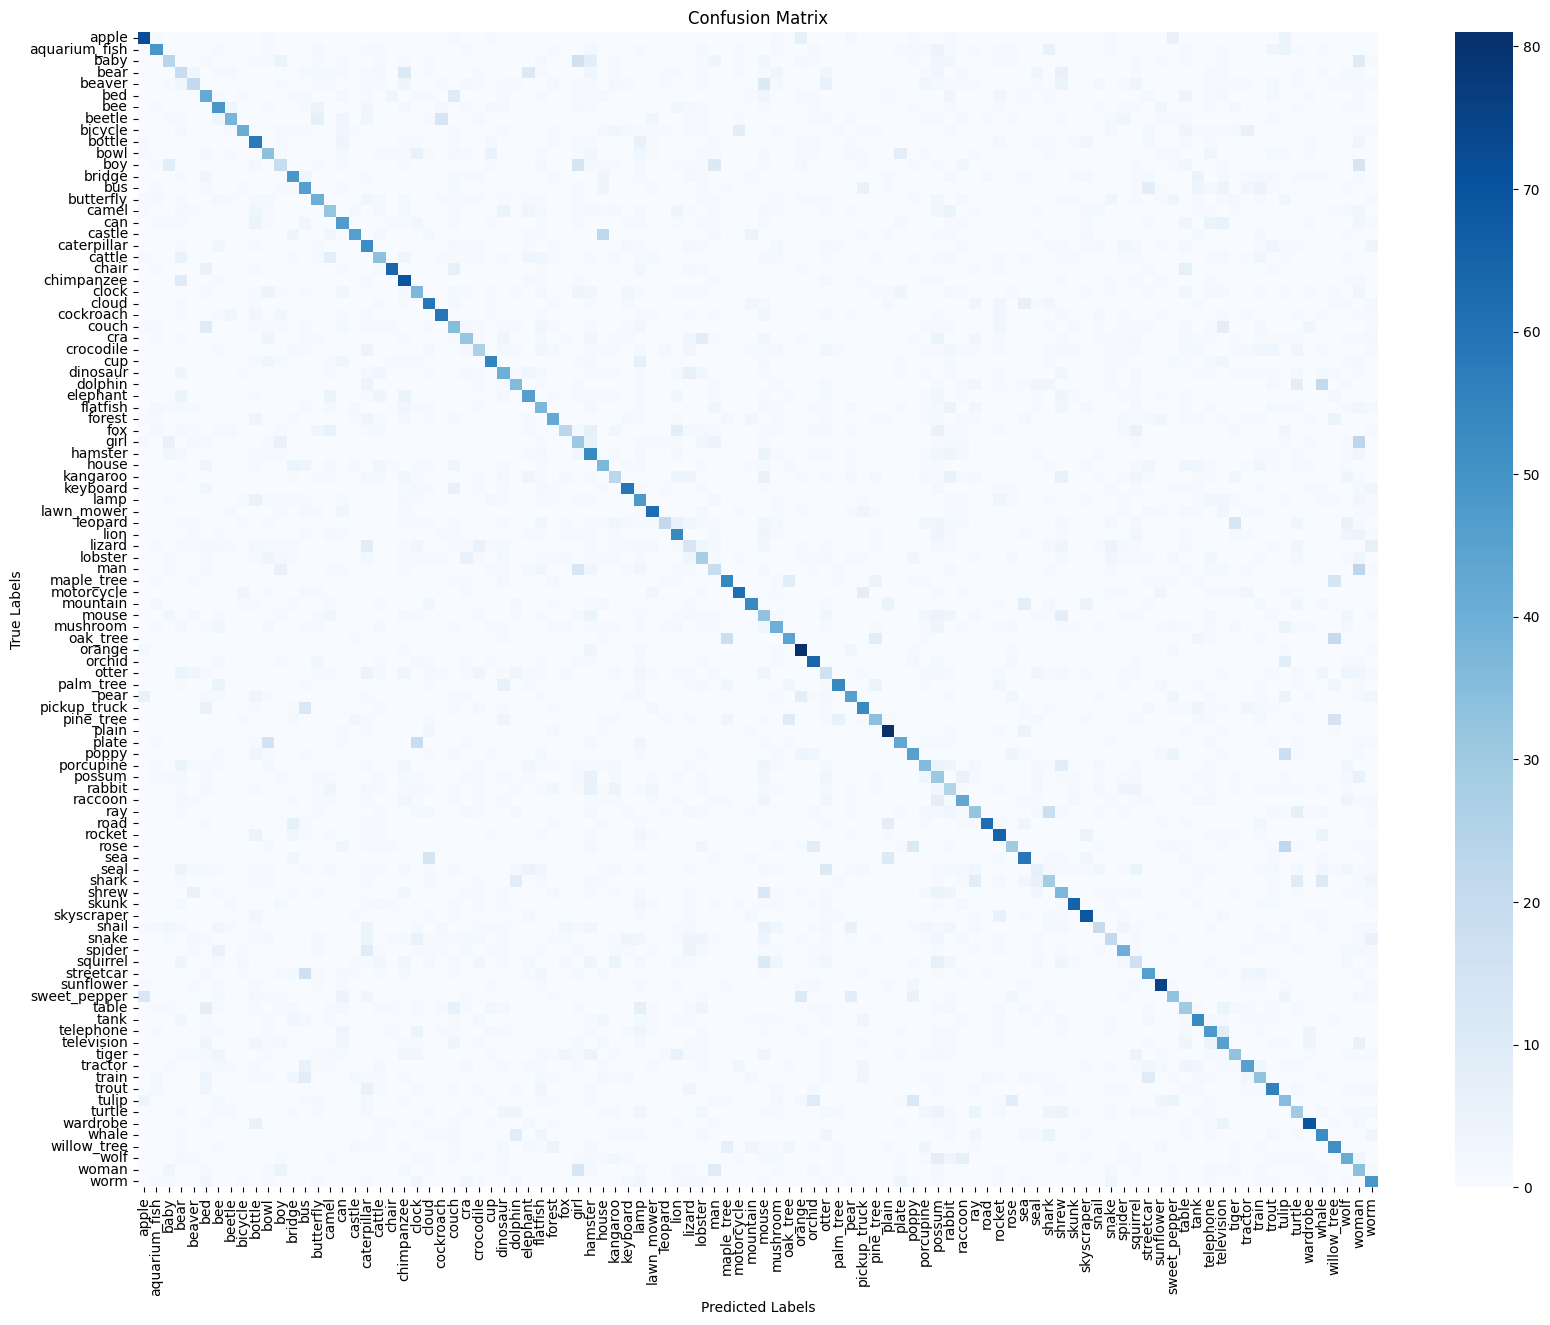

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(20, 15))
    sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Predict class probabilities
y_pred = model_2.predict(x_test)
y_true = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_class)

# Plot confusion matrix
plot_confusion_matrix(cm, cifar100_fine_label_names)

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.





### Training Set Metrics (Epoch 15):

| **Metric**   | **Model 1** | **Model 2** |
|--------------|-------------|-------------|
| Accuracy     | 75.47%      | 85.95%      |
| Precision    | 0.8589      | 0.8962      |
| Recall       | 0.6713      | 0.8282      |
| Loss         | 0.80        | 0.44        |

### Validation Set Metrics (Epoch 15):

| **Metric**   | **Model 1** | **Model 2** |
|--------------|-------------|-------------|
| Accuracy     | 33.27%      | 41.47%      |
| Precision    | 0.4428      | 0.4784      |
| Recall       | 0.2843      | 0.3844      |
| Loss         | 3.86        | 3.75        |

### Test Set Metrics:

| **Metric**   | **Model 1** | **Model 2** |
|--------------|-------------|-------------|
| Accuracy     | 33.81%      | 42.69%      |
| Precision    | 0.45        | 0.50        |
| Recall       | 0.29        | 0.40        |
| Loss         | 3.82        | 3.61        |

Model 2 demonstrates notable improvements over Model 1 in both the training and validation sets. The enhancements are attributed to the addition of BatchNormalization and Dropout in Model 2, which help in stabilizing learning, reducing overfitting, and improving generalization and performance. This is visible from the better accuracy, precision, and recall. Inspite of these improvements, there is lots of room for improvement. The model’s performance is modest, and the recall (0.40) indicates the model is still missing a significant portion of positive instances. 

Experiments were performed by adding various levels of filters to Conv2D layers. The number of filters in each Conv2D layer, increasing with depth, were 32, 64, 128, 256, and 512. This increase in the number of filters helped the model capture more complex features as the depth of the network increased. Different dropout rates of 0.5, 0.3 and 0.2 were tested and a rate of 0.2 was chosen. Different epoch numbers (5, 10, 15) were experimented with validation performance was studied to determine when to stop. Learning rates of 0.1, 0.01, 0.001 with Adam optimizer were tested. The 'sgd' optimizer was also evaluated in comparison to 'adam'. Adam optimizer with a learning rate of 0.001 was selected for its performance.

Future experiments:

1) Data Augmentation techniques could be experimented. This will increase dataset diversity and improve generalization.
2) Deeper networks or advanced models like ResNet, DenseNet, EfficientNet can be implemented. Resizing images from 32x32x3 to 224x224x3 (for ResNet) is RAM intensive and would need GPU and better RAM support.
3) Hyperparameter tuning - A few more experiments with learning rates with adam optimizer such as 0.00005 and 0.005 can affect convergence and stability. Although Adam already includes adaptive moment estimation, experiments with 'sgd' with different momentum values can also be done. The interplay between batch size and epochs can influence model's training dynamics and performance. Different batch sizes of 64, 128 could be experimented. 
4) Adding L2 regularization to Conv2D and Dense layers; experimenting with different kernel sizes, such as 5x5 could improve the model. Instead of doubling the number of filters, increasing by a factor of 1.5 or using a more gradual increase could also give better results.
5) Replace the Flatten layer with Global Average Pooling might reduce the number of parameters and possibly improve generalization.

Lastly, for managing and running machine learning experiments, transitioning from Jupyter notebooks to a framework like TensorBoard would make experimentation more efficient and manageable.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.